# North Korea's Nuclear Test

In this notebook we want to analyze the recorded nuclear test data.

In [4]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Firstly, we need to download the data from IRIS earthquake database using ObsPy package.

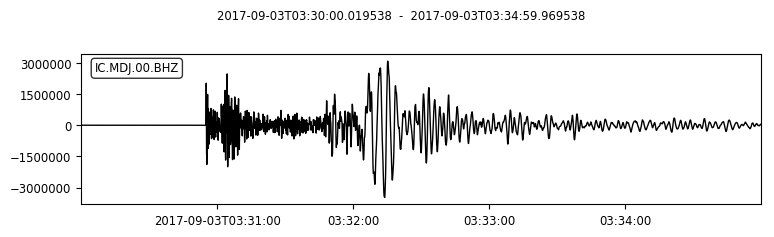

In [8]:
# use obspy library to substract data from IRIS database
from obspy.clients.fdsn import Client
client = Client("IRIS")

# choose station MDJ (China) in the IC network and plot it
from obspy import UTCDateTime
t1 = UTCDateTime("2017-09-03_03:30:00")
# {network}.{station}.{location}.{channel}
st1 = client.get_waveforms("IC", "MDJ", "00", "BHZ", t1, t1 + 5*60) # obspy stream data
st1.plot()

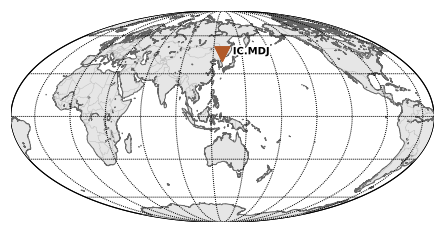

In [5]:
# plot the location of MDJ station
inventory = client.get_stations(network="IC", station="MDJ")
inventory.plot()
plt.show()

In [6]:
inventory

Inventory created at 2018-01-11T20:49:13.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.32
		    http://service.iris.edu/fdsnws/station/1/query?network=IC&station=MDJ
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IC
		Stations (2):
			IC.MDJ (Mudanjiang, Heilongjiang Province, China) (2x)
		Channels (0):


Now we want to compare this latest Nuclear test to the previous test.

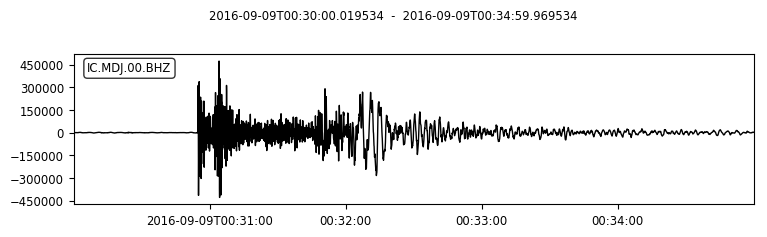

In [7]:
t2 = UTCDateTime("2016-09-09_00:30:00")
st2 = client.get_waveforms("IC", "MDJ", "00", "BHZ", t2, t2 + 5*60)
st2.plot()

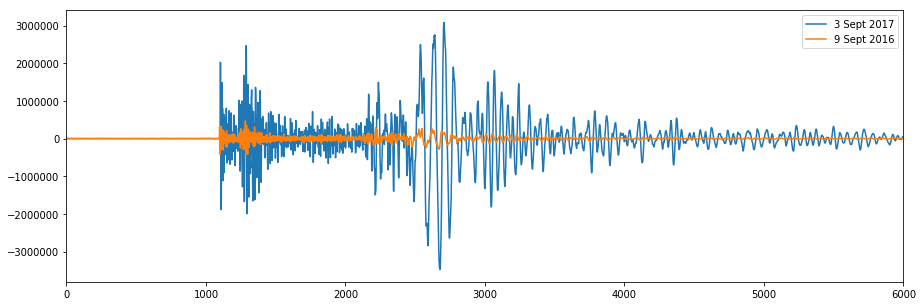

In [13]:
# plot them together
plt.figure(figsize=(15,5))
plt.plot(st1.traces[0], label="3 Sept 2017")
plt.plot(st2.traces[0], label="9 Sept 2016")
plt.legend()
plt.xlim(0,6000)
plt.show()